In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
file_path = r'C:\Users\infop\OneDrive\Desktop\ML_lab screenshots\spacex_final_dataset.csv'
df = pd.read_csv(file_path)
df

,FlightNumber,Date,Customer,Booster,Version_Booster,Payload,PayloadMass,LaunchSite,Orbit,Flights,...,Reused,GridFins,Legs,Longitude,Latitude,Outcome,Booster_Landing,Class_verification,Class,Failure
0,6,2010-06-04,SpaceX,Falcon 9,F9 v1.0,Dragon Spacecraft Qualification Unit,8191,Cape Canaveral,LEO,1,...,0,0,0,-80.577366,28.561857,Failure (None),Failure,0.0,0,1
1,8,2012-05-22,NASA,Falcon 9,F9 v1.0,SpaceX COTS Demo Flight 2,525,Cape Canaveral,LEO,1,...,0,0,0,-80.577366,28.561857,Failure (None),No attempt\n,0.0,0,1
2,10,2013-03-01,NASA,Falcon 9,F9 v1.0,SpaceX CRS-2,677,Cape Canaveral,ISS,1,...,0,0,0,-80.577366,28.561857,Failure (None),No attempt\n,0.0,0,1
3,11,2013-09-29,MDA,Falcon 9,F9 v1.1,CASSIOPE,500,Vandenberg AF Base,PO,1,...,0,0,0,-120.610829,34.632093,Failure (Ocean),Uncontrolled,0.0,0,1
4,12,2013-12-03,SES,Falcon 9,F9 v1.1,SES-8,3170,Cape Canaveral,GTO,1,...,0,0,0,-80.577366,28.561857,Failure (None),No attempt,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,182,2022-08-31,SpaceX,Falcon 9,F9 B5,Starlink Group 3-4,13260,Vandenberg AF Base,VLEO,7,...,1,1,1,-120.610829,34.632093,Success (Drone Ship),Success,1.0,1,0
164,185,2022-09-17,SpaceX,Falcon 9,F9 B1067.6,Starlink,13260,Cape Canaveral,VLEO,6,...,1,1,1,-80.577366,28.561857,Success (Drone Ship),NaN,1.0,1,0
165,186,2022-09-24,SpaceX,Falcon 9,F9 B5B1073.4,Starlink Group 4-35,13260,Cape Canaveral,VLEO,4,...,1,1,1,-80.577366,28.561857,Success (Drone Ship),Success,1.0,1,0
166,187,2022-10-05,NASA,Falcon 9,F9 B5,Crew-5,8191,Kennedy Space Center,ISS,1,...,0,1,1,-80.603956,28.608058,Success (Drone Ship),Success,1.0,1,0


In [4]:
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [5]:
#separate the Feature data X for train test split
X = df[[ 'Flights', 'PayloadMass', 'ReusedCount', 'Reused', 'LaunchSite', 'Orbit']]
X

,Flights,PayloadMass,ReusedCount,Reused,LaunchSite,Orbit
0,1,8191,0,0,Cape Canaveral,LEO
1,1,525,0,0,Cape Canaveral,LEO
2,1,677,0,0,Cape Canaveral,ISS
3,1,500,0,0,Vandenberg AF Base,PO
4,1,3170,0,0,Cape Canaveral,GTO
...,...,...,...,...,...,...
163,7,13260,6,1,Vandenberg AF Base,VLEO
164,6,13260,5,1,Cape Canaveral,VLEO
165,4,13260,0,1,Cape Canaveral,VLEO
166,1,8191,0,0,Kennedy Space Center,ISS


In [6]:
X['LaunchSite'].unique()

array(['Cape Canaveral', 'Vandenberg AF Base', 'Kennedy Space Center'],
      dtype=object)

In [7]:
X = pd.get_dummies(X)
X

,Flights,PayloadMass,ReusedCount,Reused,LaunchSite_Cape Canaveral,LaunchSite_Kennedy Space Center,LaunchSite_Vandenberg AF Base,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_TLI,Orbit_VLEO
0,1,8191,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,525,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,677,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,500,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,3170,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7,13260,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
164,6,13260,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
165,4,13260,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
166,1,8191,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
# Standardize the feature data to train on  
transform = preprocessing.StandardScaler()
transform.fit_transform(X) #the Standardized Feature Data
X

,Flights,PayloadMass,ReusedCount,Reused,LaunchSite_Cape Canaveral,LaunchSite_Kennedy Space Center,LaunchSite_Vandenberg AF Base,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_TLI,Orbit_VLEO
0,1,8191,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,525,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,677,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,500,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,3170,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7,13260,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
164,6,13260,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
165,4,13260,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
166,1,8191,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [10]:
Y_test.shape

(34,)

In [11]:
#set parameters for GridSearchCV object and machine learning estimator object creation
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
#create logreg object and use it in gridsearch
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters).fit(X_train, Y_train)

C:\Users\infop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\infop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [13]:
#print best parameters and accuracy
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.873076923076923


In [14]:
#get score on logreg model and report it
logreg_score = logreg_cv.score(X_test, Y_test)
print("score :", logreg_score)

score : 0.9117647058823529


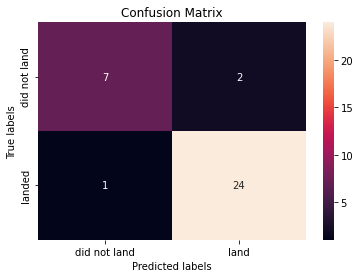

In [15]:
#make predictions and plot in confusion matrix
logreg_yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,logreg_yhat)

In [16]:
logreg_cv_accuracy_score = accuracy_score(Y_test, logreg_yhat)
print("accuracy score :",logreg_cv_accuracy_score)

accuracy score : 0.9117647058823529


In [17]:
#create SVM model to predict the class
parameters = {'kernel':['rbf'],
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [18]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.8071428571428572


In [19]:
svm_cv_score = svm_cv.score(X_test, Y_test)
print("score :",svm_cv_score)

score : 0.7941176470588235


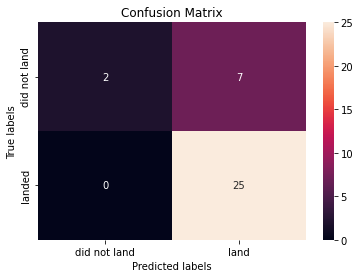

In [20]:
svm_yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,svm_yhat)

In [21]:
svm_cv_accuracy_score = accuracy_score(Y_test, svm_yhat)
print("accuracy score :",svm_cv_accuracy_score)

accuracy score : 0.7941176470588235


In [22]:
#create decision tree model to predict the class
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [23]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8741758241758241


In [24]:
tree_cv_score = tree_cv.score(X_test, Y_test)
print("score :",tree_cv_score)

score : 0.9411764705882353


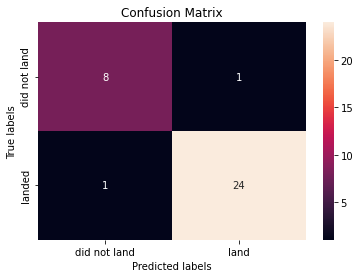

In [25]:
tree_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,tree_yhat)

In [26]:
tree_cv_accuracy_score = accuracy_score(Y_test, tree_yhat)
print("accuracy score :",tree_cv_accuracy_score)

accuracy score : 0.9411764705882353


In [27]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [28]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 2}
accuracy : 0.7972527472527473


In [29]:
knn_cv_score = knn_cv.score(X_test, Y_test)
print("score :",knn_cv_score)

score : 0.7647058823529411


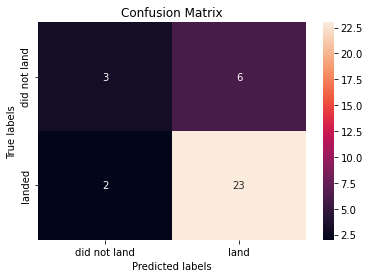

In [30]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,knn_yhat)

In [31]:
knn_cv_accuracy_score = accuracy_score(Y_test, knn_yhat)
print("accuracy score :",knn_cv_accuracy_score)

accuracy score : 0.7647058823529411


In [36]:
#find the model that performs the best at predicting the Class
accuracy = [svm_cv_accuracy_score, logreg_cv_accuracy_score, knn_cv_accuracy_score, tree_cv_accuracy_score]
accuracy = [i * 100 for i in accuracy]

method = ['SVM', 'LogReg', 'KNN', 'Tree']
models = {'ML Method':method, 'Accuracy Score (%)':accuracy}

ML_df = pd.DataFrame(models)
ML_df = ML_df.sort_values(by=['Accuracy Score (%)'], ascending=False)
ML_df

,ML Method,Accuracy Score (%)
3,Tree,94.117647
1,LogReg,91.176471
0,SVM,79.411765
2,KNN,76.470588


<AxesSubplot:xlabel='ML Method', ylabel='Accuracy Score (%)'>

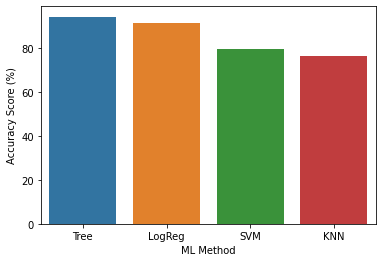

In [37]:
sns.barplot(data= ML_df, x='ML Method',  y='Accuracy Score (%)')

In [34]:
from sklearn.metrics import jaccard_score, f1_score

# Examining the scores from Test sets
jaccard_scores = [
                  jaccard_score(Y_test, logreg_yhat, average='binary'),
                  jaccard_score(Y_test, svm_yhat, average='binary'),
                  jaccard_score(Y_test, tree_yhat, average='binary'),
                  jaccard_score(Y_test, knn_yhat, average='binary'),
                 ]

f1_scores = [
             f1_score(Y_test, logreg_yhat, average='binary'),
             f1_score(Y_test, svm_yhat, average='binary'),
             f1_score(Y_test, tree_yhat, average='binary'),
             f1_score(Y_test, knn_yhat, average='binary'),
            ]

accuracy = [logreg_score, svm_cv_score, tree_cv_score, knn_cv_score]

scores_test = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]), index=['Jaccard_Score', 'F1_Score', 'Accuracy'] , columns=['LogReg', 'SVM', 'Tree', 'KNN'])
scores_test

,LogReg,SVM,Tree,KNN
Jaccard_Score,0.888889,0.781250,0.923077,0.741935
F1_Score,0.941176,0.877193,0.960000,0.851852
Accuracy,0.911765,0.794118,0.941176,0.764706


In [35]:
models = {'KNeighbors':knn_cv.best_score_,
              'DecisionTree':tree_cv.best_score_,
              'LogisticRegression':logreg_cv.best_score_,
              'SupportVector': svm_cv.best_score_}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_cv.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
if bestalgorithm == 'SupportVector':
    print('Best params is :', svm_cv.best_params_)

Best model is DecisionTree with a score of 0.8741758241758241
Best params is : {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
